In [1]:
pip install conda

In [2]:
pip install pysoundfile

In [3]:
import librosa    #Python Library for analysing audio
import soundfile
import os, glob, pickle
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as functional
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import os.path
import pdb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


##########################################

AUDIO_EXTENSIONS = [
    '.wav', '.WAV',
]

def is_audio_file(filename):
    return any(filename.endswith(extension) for extension in AUDIO_EXTENSIONS)

def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

def make_dataset(dir, class_to_idx):
    spects = []
    dir = os.path.expanduser(dir)
    for target in sorted(os.listdir(dir)):
        d = os.path.join(dir, target)
        if not os.path.isdir(d):
            continue

        for root, _, fnames in sorted(os.walk(d)):
            for fname in sorted(fnames):
                if is_audio_file(fname):
                    path = os.path.join(root, fname)
                    item = (path, class_to_idx[target])
                    spects.append(item)
    return spects

In [5]:
def extract_features(file_name, mfcc, chroma, mel, contrast,tonnetz):    
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype = "float32")
        sample_rate = sound_file.samplerate
 
        if chroma:
            stft = np.abs(librosa.stft(X))
            result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y = X, sr = sample_rate, n_mfcc = 40).T, axis = 0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis = 0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr = sample_rate).T, axis = 0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    
    return result

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Get the directories which represent the classes
# dirPath = "/content/drive/My Drive/AllData"
# classes,class_to_idx = find_classes(dirPath)

# spects = make_dataset(dirPath,class_to_idx)
#print(spects)

In [8]:
from sklearn.model_selection import train_test_split
import csv

def load_data(test_size, happy, anger, neural ,sad):
  X, y = [], []
  y_class=['happy', 'anger','neural','sad']
  print(y_class)
    #if csv :#:
    # for file in spects:
    #     file_name = file[0]
    #     emotion = file[1]
    #     feature=extract_features(file_name, mfcc = True, chroma = True, mel = True, contrast= True ,tonnetz= True, zeros= True)
    #     X.append(feature)
    #     y.append(emotion)

  if happy:
    with open('/content/drive/My Drive/final project/f_happy.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_happy.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
          y.append(row)
  
  if anger:
    with open('/content/drive/My Drive/final project/f_anger.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_anger.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
           y.append(row)

  if sad:  
    with open('/content/drive/My Drive/final project/f_sad.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_sad.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
           y.append(row)

  if neural:  
    with open('/content/drive/My Drive/final project/f_neutral.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile,quoting=csv.QUOTE_NONNUMERIC)
       for row in csvReader:
         X.append(row)

    with open('/content/drive/My Drive/final project/labels_neutral.csv') as csvDataFile:
       csvReader = csv.reader(csvDataFile)
       for row in csvReader:
           y.append(row)

  return train_test_split(np.array(X), y, test_size = test_size, random_state = 9)

In [9]:
##Classifiers are trained to be used below :

# 1. clasiffier between happy and anger

X_train_1, X_test_1, y_train_1, y_test_1 = load_data(test_size = 0.25, happy=True, anger=True, neural=False ,sad=False)

classifier1 = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), 
                    learning_rate='adaptive', max_iter = 500)
classifier1.fit(X_train_1, y_train_1)
y_pred_1=classifier1.predict(X_test_1)

accuracy = accuracy_score(y_true = y_test_1, y_pred = y_pred_1)
print("Accuracy: {:.2f}%".format(accuracy*100))

['happy', 'anger', 'neural', 'sad']


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 78.09%


In [10]:
# 2. clasiffier between neutral & sad
X_train_2, X_test_2, y_train_2, y_test_2 = load_data(test_size = 0.25, happy=False, anger=False, neural=True ,sad=True)

classifier2 = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), 
                    learning_rate='adaptive', max_iter = 500)
classifier2.fit(X_train_2, y_train_2)
y_pred_2=classifier2.predict(X_test_2)

accuracy = accuracy_score(y_true = y_test_2, y_pred = y_pred_2)
print("Accuracy: {:.2f}%".format(accuracy*100))

['happy', 'anger', 'neural', 'sad']


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 80.90%


In [11]:
# classifier between happy+angry--0  VS.  Neu+sad--1  
X_train, X_test, y_train, y_test = load_data(test_size = 0.25, happy=True, anger=True, neural=True ,sad=True)

y_train_bin , y_test_bin = [], []  #they binarys & y_train, y_test regulars

[ y_train_bin.append(0) if y_train[i][0]=='happy' or y_train[i][0]=='anger' else y_train_bin.append(1) for i in range(len(y_train))]
[ y_test_bin.append(0) if y_test[i][0]=='happy' or y_test[i][0]=='anger' else y_test_bin.append(1) for i in range(len(y_test))]

classifier = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), 
                    learning_rate='adaptive', max_iter = 500)

classifier.fit(X_train,y_train_bin)  
y_pred=classifier.predict(X_test)
accuracy = accuracy_score(y_true = y_test_bin, y_pred = y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

['happy', 'anger', 'neural', 'sad']
Accuracy: 91.73%


In [12]:
## start of hierarchical !! layer 1 
X_hir= []
y_true, y_hir_pred, y_hir_bin= [] , [] ,[]

 #collect all the example to be test
[X_hir.append(X_train[i]) for i in range(len(X_train))]
[X_hir.append(X_test[i]) for i in range(len(X_test))]

[y_true.append(y_train[i]) for i in range(len(y_train))]
[y_true.append(y_test[i]) for i in range(len(y_test))]

[y_hir_bin.append(y_train_bin[i]) for i in range(len(y_train_bin))]
[y_hir_bin.append(y_test_bin[i]) for i in range(len(y_test_bin))]

y_hir_pred=classifier.predict(X_hir) #1 classifier
print(len(X_hir))
print()

6671



In [13]:
# layer 2 --- all happy & anger goto classifier 1 , 
X1 = []  #0 - happy, anger - only examples
X2 = []  #1- ...
y_true_1= []
y_true_2= []
y_allPreds, y_allTrue=[],[]

for i in range(len(y_hir_pred)):
  if y_hir_pred[i]==0:
    X1.append(X_hir[i])
    y_true_1.append(y_true[i])
  else:
    X2.append(X_hir[i])
    y_true_2.append(y_true[i])
 
y_pred_finally=classifier1.predict(X1)
result=classifier1.predict_proba(X1)
#print(result)

[y_allPreds.append(y_pred_finally[i]) for i in range(len(y_pred_finally))]
[y_allTrue.append(y_true_1[i]) for i in range(len(y_true_1))]

y_pred_finally=classifier2.predict(X2)
result2=classifier2.predict_proba(X2)
#print(y_pred_finally)

[y_allPreds.append(y_pred_finally[i]) for i in range(len(y_pred_finally))]
[y_allTrue.append(y_true_2[i]) for i in range(len(y_true_2))]
 
accuracy = accuracy_score(y_true = y_allTrue, y_pred = y_allPreds)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 86.60%


In [14]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

[[1633   81   17   16]
 [ 187 1382   70   81]
 [  11   30 1206  302]
 [   4   18   77 1556]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


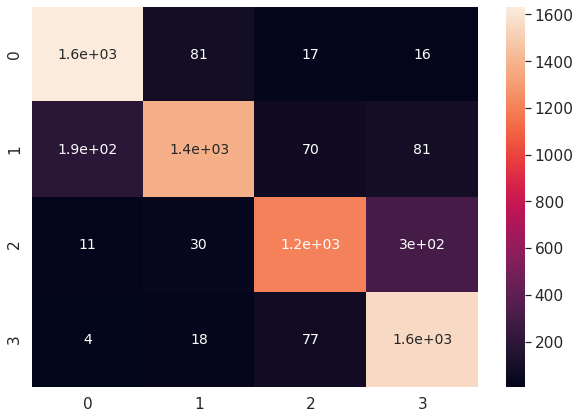

In [15]:

# Plot non-normalized confusion matrix
import seaborn as sn
import pandas as pd
#!pip install matplotlib==3.1.0 # Solves the confusion matrix gets cut
cm = confusion_matrix(y_allTrue, y_allPreds, labels=["anger", "happy", "neutral", "sad"])
print(cm)
df_cm = pd.DataFrame(cm, range(len(cm)),
                  range(len(cm)))

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14})# font size

plt.show()

In [16]:
## new example

def predict_new_audio(*new_ex):
  y_pred=classifier.predict(new_ex)
  result=classifier.predict_proba(new_ex)
  print(result)

  if(y_pred==0):
    y_pred_finally=classifier1.predict(new_ex)
    result=classifier1.predict_proba(new_ex)
    print(result)
  else:
    y_pred_finally=classifier2.predict(new_ex)
    result=classifier2.predict_proba(new_ex)
    print(result)
  return y_pred_finally

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
feature = extract_features("/content/drive/My Drive/try/dana.wav", mfcc = True, chroma = True, mel = True, contrast= True ,tonnetz= True)

In [19]:
label_new = predict_new_audio(feature)
print(label_new)

[[1.0000000e+00 8.0607574e-12]]
[[2.69580233e-05 9.99973042e-01]]
['happy']


In [20]:
# import torch
# torch.save(classifier,"/content/drive/My Drive/final project/saveModel/model1")